<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/My Drive/Python Course/Churn.csv")

## Data Overview

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3769,3770,15663263,Collins,698,France,Male,47,5,156265.31,2,0,0,1055.66,0
7223,7224,15729771,Davide,799,Germany,Male,31,9,154586.92,1,0,1,88604.89,1
8299,8300,15792473,Reilly,598,Germany,Female,50,5,88379.81,3,0,1,64157.24,1
9605,9606,15733444,Phillips,736,France,Female,29,9,0.00,2,0,0,176152.70,0
2717,2718,15648702,Yuriev,775,Germany,Male,70,6,119684.88,2,1,1,74532.02,0
154,155,15709368,Milne,614,France,Female,43,6,0.00,2,1,1,109041.53,0
2663,2664,15717898,Bruce,542,Spain,Male,32,2,131945.94,1,0,1,159737.56,0
4133,4134,15667602,Cheng,704,Spain,Male,33,3,0.00,2,1,0,73018.74,0
8000,8001,15629002,Hamilton,747,Germany,Male,36,8,102603.30,2,1,1,180693.61,0
4156,4157,15599452,Conti,605,Germany,Female,43,8,125338.80,2,1,0,23970.13,0


Let us drop rownumber, customerID and surname as these features won't help in model building

In [ ]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let us create a backup

In [ ]:
df=data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


2 columns are object type, others are numerical

Let us check for duplicated values

In [ ]:
data.duplicated().sum()

0

No duplicate values

Let us check for missing values

In [ ]:
data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


There are no missing values

In [ ]:
#Let us check if there are any invalid values in the target variable
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


There is no invalid values in the target variable

In [ ]:
#Let us check the number of unique values of geography
data['Geography'].nunique()

3

## Exploratory Data Analysis

### Univariate Analysis

Let us perform univariate analysis with respect to the target variable

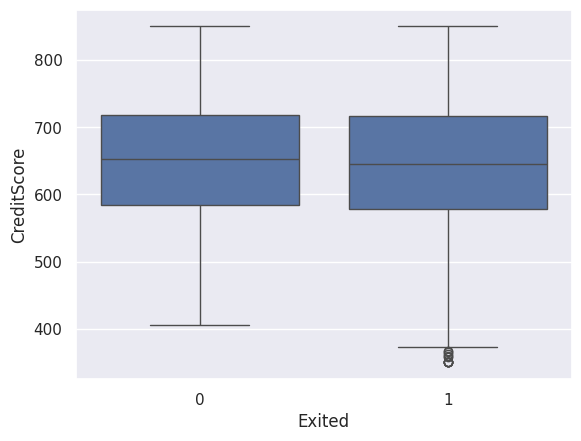

In [ ]:
#Let us analyze Credit score
sns.boxplot(data=data,y='CreditScore',x='Exited')
plt.show()



There are some outliers with very low credit score, and these are for customers who had exited. This means that customers with very low credit score exit.But overall Credit Score does not show any major direct impact on the customer churn.

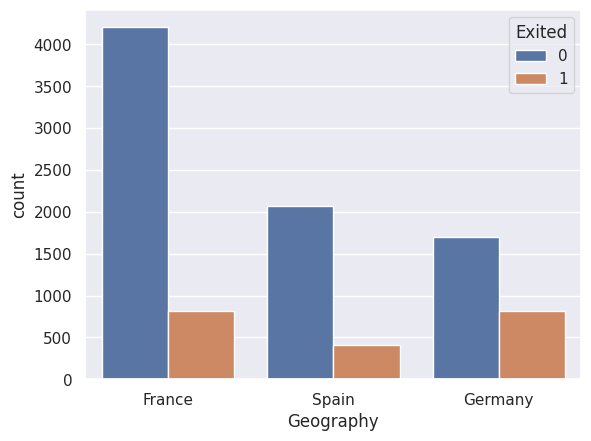

In [ ]:
#Let us analyze Geography
sns.countplot(data=data,x='Geography',hue='Exited')
plt.show()

Germany has proportinately more people exiting

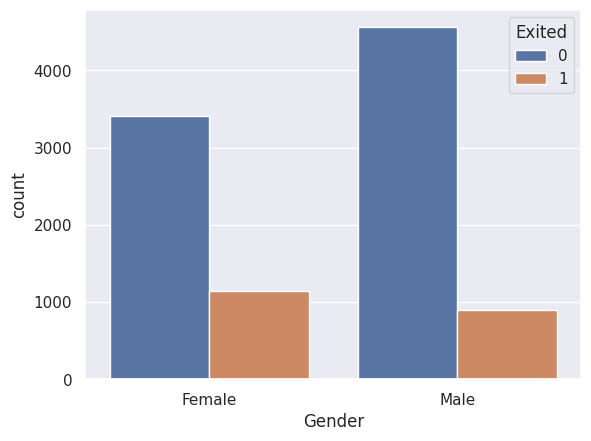

In [ ]:
#Let us analyze Gender
sns.countplot(data=data,x='Gender',hue='Exited')
plt.show()

Proportionately Females are exiting more

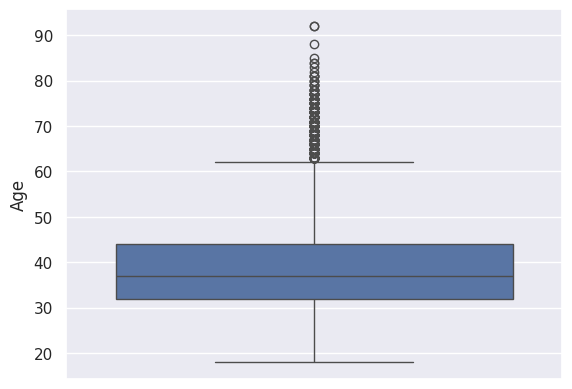

In [ ]:
sns.boxplot(data=data,y='Age')
plt.show()

There are outliers in age, but looks like valid values

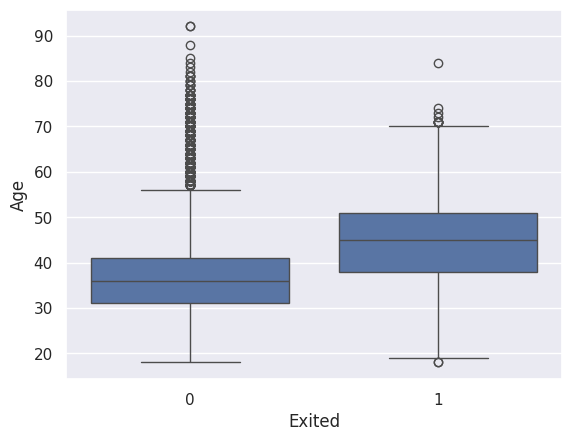

In [ ]:
#Let us analyze Age
sns.boxplot(data=data,y='Age',x='Exited')
plt.show()

Age is spread across for both exited and non-exited cases

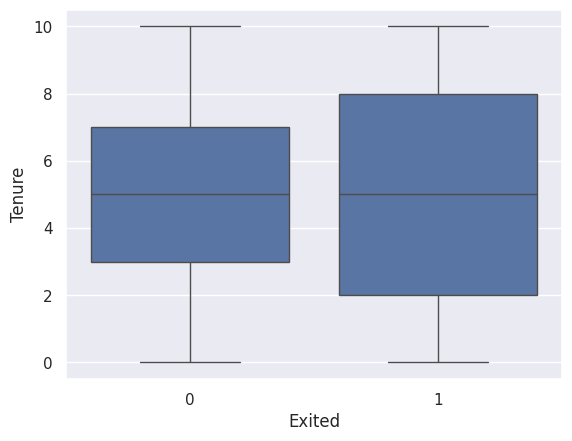

In [ ]:
#Let us analyze tenure with respect to the target variable
sns.boxplot(data=data,y='Tenure',x='Exited')
plt.show()

Mean same for both exited and non-exited customers and tenure does not show any major impact to exited.

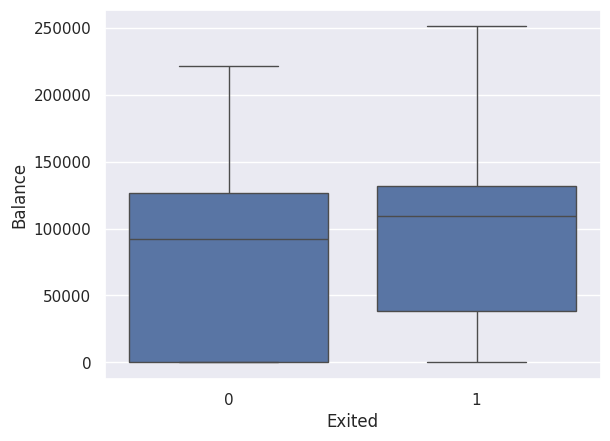

In [ ]:
#Let us analyze balance with respect to the target variable
sns.boxplot(data=data,y='Balance',x='Exited')
plt.show()

Exited customers have marginally higher balance

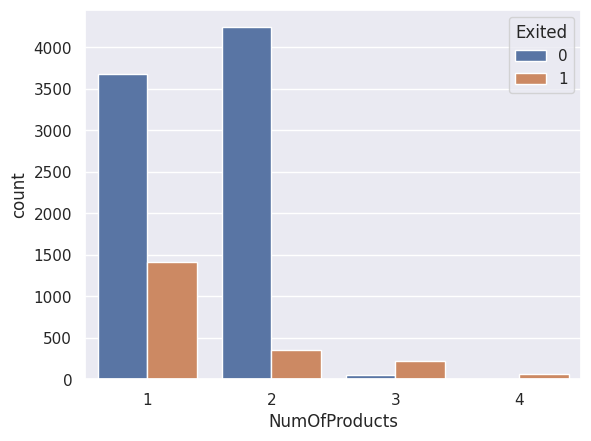

In [ ]:
#Let us analyze number of products
sns.countplot(data=data,x='NumOfProducts',hue='Exited')
plt.show()

Customers with one product have exited the most

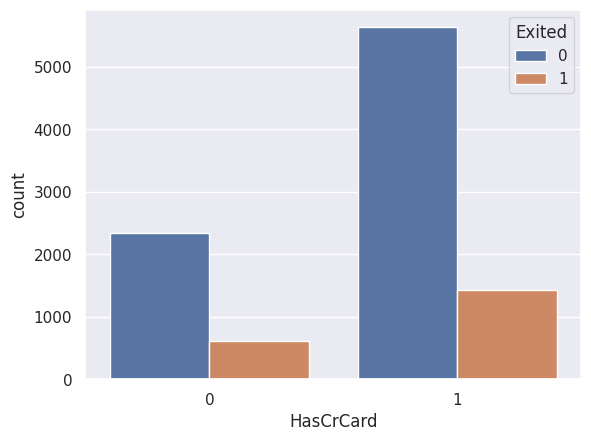

In [ ]:
#Let us analyze relationship of having a credit card and exiting
sns.countplot(data=data,x='HasCrCard',hue='Exited')
plt.show()

This looks kind of proportionate and does not show any correlation

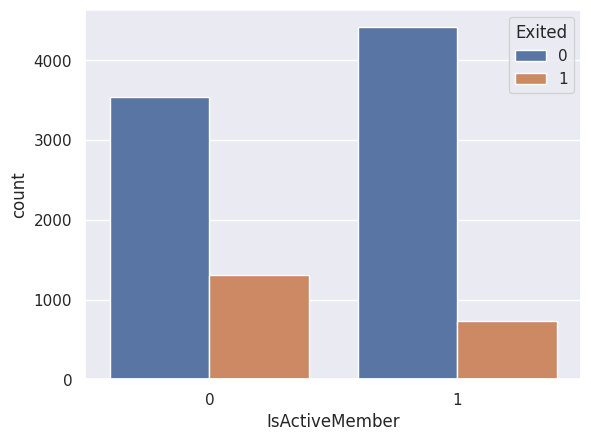

In [ ]:
#Relation with isactivemember
sns.countplot(data=data,x='IsActiveMember',hue='Exited')
plt.show()

There is a correlation - non active members have higher chances of churning

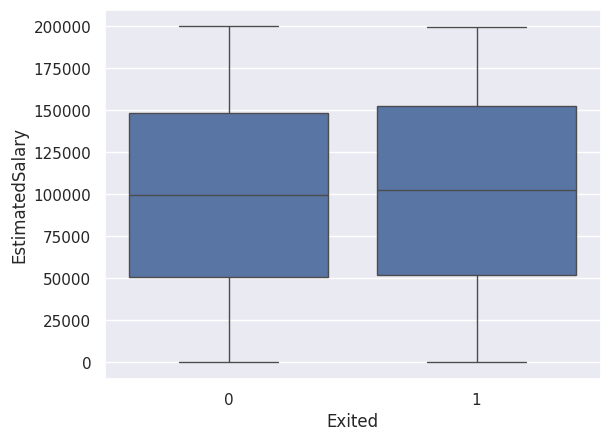

In [ ]:
#relation with estimated salary
sns.boxplot(data=data,y='EstimatedSalary',x='Exited')
plt.show()

Does not show much correlation with estimated salary

### Bivariate Analysis

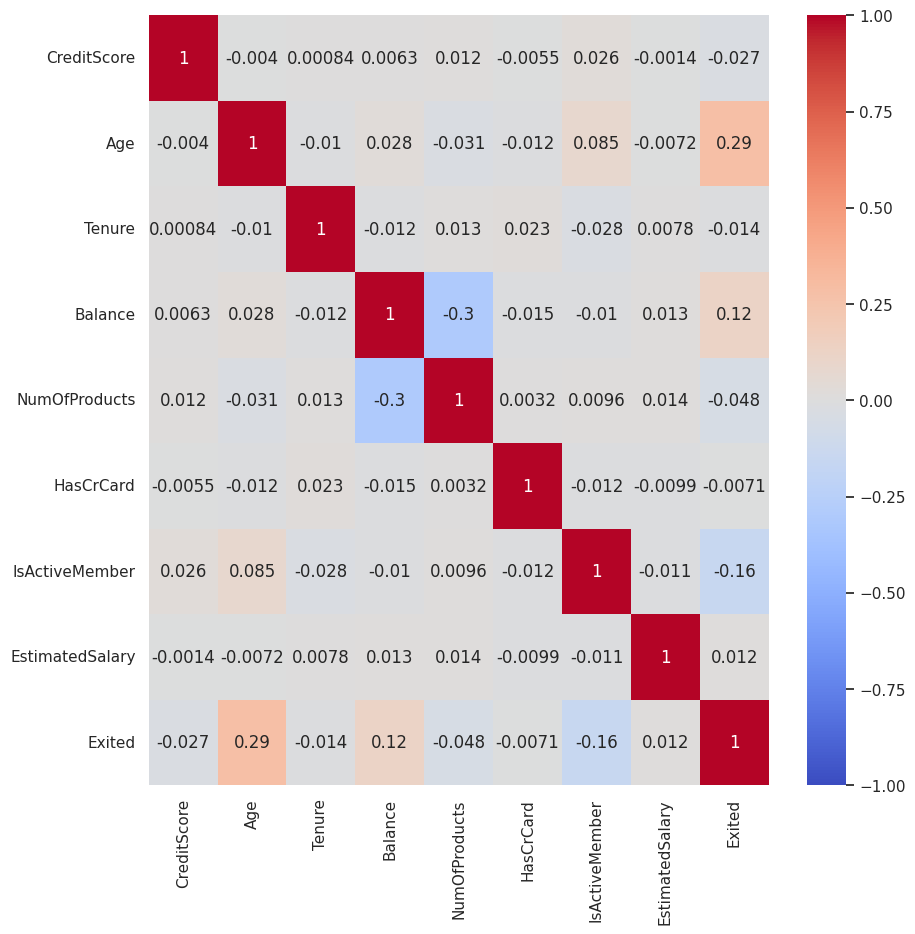

In [ ]:
#Let us create a heatmap of the numeric variables
plt.figure(figsize=(10,10))
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()


Exited shows a weak correlation with age and no correlation with other input variables.

## Data Preprocessing

In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


### Dummy Variable Creation

Let us create dummy variables for the categorical variables - Geography and Gender

In [ ]:
df = pd.get_dummies(df,
    columns=df.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,dtype=int
)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
df.shape

(10000, 12)

### Train-validation-test Split

In [ ]:
#Split dataframe into dependent and independent variables
x=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
# splitting the data in 80:20 ratio for train and temporary data
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2,random_state=1)

In [ ]:
# splitting the temporary data in 50:50 ratio for validation and test data
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in validation data =", x_val.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 8000
Number of rows in validation data = 1000
Number of rows in test data = 1000


### Data Normalization

In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
# Define the columns to scale
num_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(x_train[num_columns])

StandardScaler()

In [ ]:
# Transform selected columns in x_train, x_val, and x_test using the fitted scaler

x_train[num_columns] = scaler.transform(x_train[num_columns])

x_val[num_columns] = scaler.transform(x_val[num_columns])

x_test[num_columns] = scaler.transform(x_test[num_columns])

In [ ]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,-0.230820,-0.944500,-0.701742,0.588173,0.802257,0,1,0.427394,1,0,1
5140,-0.251509,-0.944500,-0.355203,0.469849,0.802257,0,0,-1.025487,0,0,0
2568,-0.396330,0.774987,0.337876,0.858788,-0.911510,1,1,-0.944798,1,0,0
3671,-0.044622,1.252622,0.337876,0.565604,0.802257,0,1,-0.551946,1,0,0
7427,0.658795,-0.562392,1.030954,0.730395,-0.911510,0,0,1.083383,0,1,1


Data has been normalized

In [ ]:
x_train.shape

(8000, 11)

## Model Building

In [ ]:
def plot(history, name):
    """
    Function to plot loss/recall curves

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Recall
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","time(secs)","Train_loss","Valid_loss","Train_Recall","Val_Recall"]

results = pd.DataFrame(columns=columns)



### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- We would use recall as our metrics of interest as our target is to minimize false negatives. We do not want to flag a customer who has a chance to churn as a customer who would stay. This would be detrimental to the business. Our aim is to identify the customers who have a chance to churn


Setting Recall as the metric of our interest

In [ ]:
metrics=[tf.keras.metrics.Recall(name='Recall')]

### Neural Network with SGD Optimizer

We will start of with a simple neural network without any hidden layers and with SGD Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
epochs = 25
batch_size = x_train.shape[0]

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - Recall: 0.2293 - loss: 2.6517 - val_Recall: 0.2011 - val_loss: 2.5066
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - Recall: 0.2269 - loss: 2.6292 - val_Recall: 0.2011 - val_loss: 2.4667
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - Recall: 0.2226 - loss: 2.5931 - val_Recall: 0.1955 - val_loss: 2.4255
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - Recall: 0.2195 - loss: 2.5715 - val_Recall: 0.1955 - val_loss: 2.4006
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - Recall: 0.2158 - loss: 2.5530 - val_Recall: 0.1899 - val_loss: 2.3642
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - Recall: 0.2139 - loss: 2.5314 - val_Recall: 0.1899 - val_loss: 2.3393
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - Recall: 0.2121 - loss: 2.5054 - val_Recall: 0.1788 - val_loss: 2.2037
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - Recall: 0.1967 - loss: 2.4775 - val_Recall: 0.1788 - val_loss: 2.1841
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  9.40144658088684


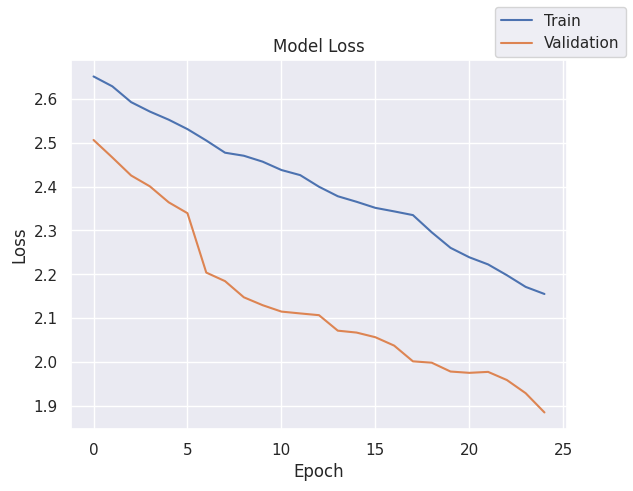

In [ ]:
plot(history,'loss')

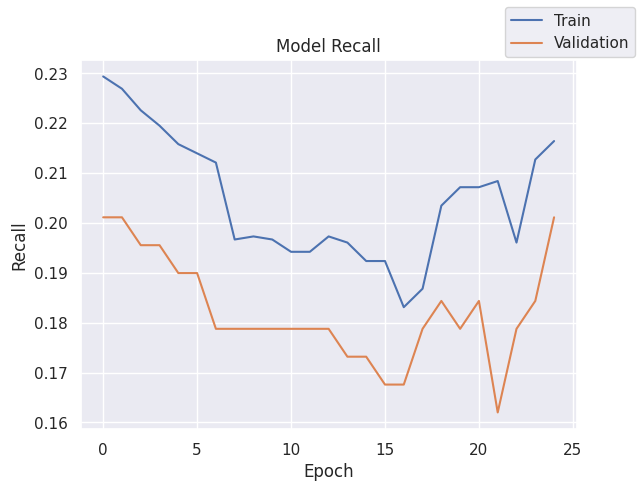

In [ ]:
#Let us plot the recall graph
plot(history,'Recall')

In [ ]:
results.loc[0]=['-','-','-',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.2164,0.201117


Since this is simple neural network, the recall scores are not good as expected.

Let us rerun with a smaller batch size

In [ ]:
start = time.time()
batch_size = 100
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - Recall: 0.2318 - loss: 1.9504 - val_Recall: 0.4525 - val_loss: 1.1429
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - Recall: 0.3926 - loss: 1.1596 - val_Recall: 0.3855 - val_loss: 0.7371
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - Recall: 0.3751 - loss: 0.7735 - val_Recall: 0.3687 - val_loss: 0.5296
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - Recall: 0.2559 - loss: 2.4053 - val_Recall: 0.0838 - val_loss: 2.8472
Epoch 5/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - Recall: 0.0926 - loss: 2.9133 - val_Recall: 0.2514 - val_loss: 1.8407
Epoch 6/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - Recall: 0.2736 - loss: 1.8147 - val_Recall: 0.7263 - val_loss: 7.2005
Epoch 7/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - Recall: 0.5750 - loss: 4.9829 - val_Recall: 0.2346 - val_loss: 1.6241
Epoch 8/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - Recall: 0.7451 - loss: 8.6954 - val_Recall: 0.6927 - val_loss: 8.0079
Epoch 9/25
80/80

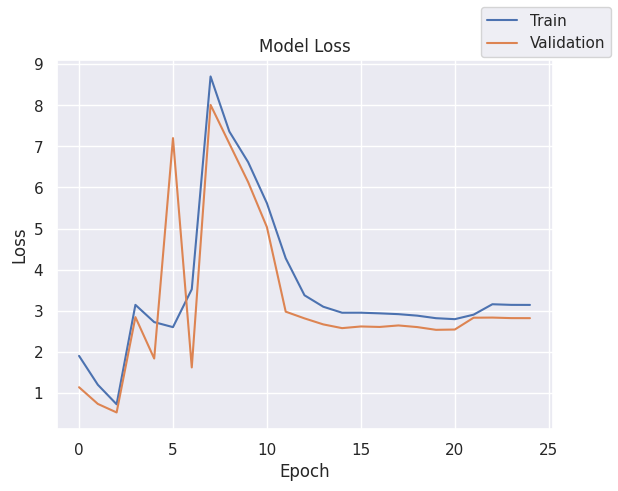

In [ ]:
plot(history,'loss')

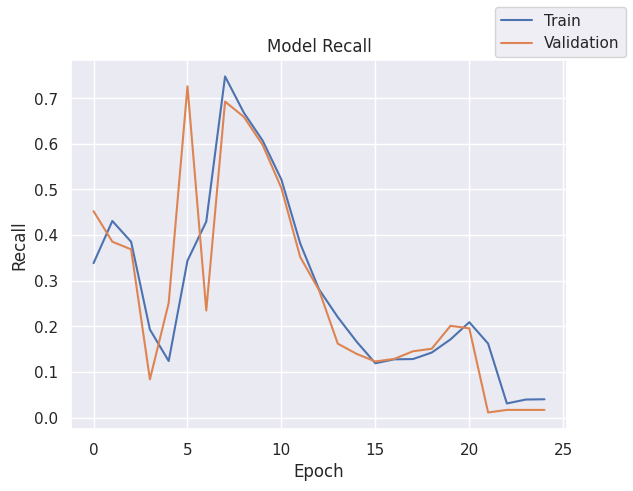

In [ ]:
plot(history,'Recall')

In [ ]:
results.loc[1]=['-','-','-',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760


In [ ]:
#Now let us add a hidden layer
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=100, epochs=25)
end=time.time()

Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - Recall: 0.7252 - loss: 0.9474 - val_Recall: 0.6983 - val_loss: 0.6885
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - Recall: 0.4949 - loss: 0.6519 - val_Recall: 0.1788 - val_loss: 0.5677
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - Recall: 0.1292 - loss: 0.5643 - val_Recall: 0.0503 - val_loss: 0.5209
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - Recall: 0.0289 - loss: 0.5299 - val_Recall: 0.0223 - val_loss: 0.4985
Epoch 5/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - Recall: 0.0131 - loss: 0.5134 - val_Recall: 0.0112 - val_loss: 0.4857
Epoch 6/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - Recall: 0.0048 - loss: 0.5037 - val_Recall: 0.0056 - val_loss: 0.4772
Epoch 7/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - Recall: 0.0033 - loss: 0.4971 - val_Recall: 0.0056 - val_loss: 0.4708
Epoch 8/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - Recall: 0.0015 - loss: 0.4919 - val_Recall: 0.0056 - val_loss: 0.4655
Epoch 9/25
80/80

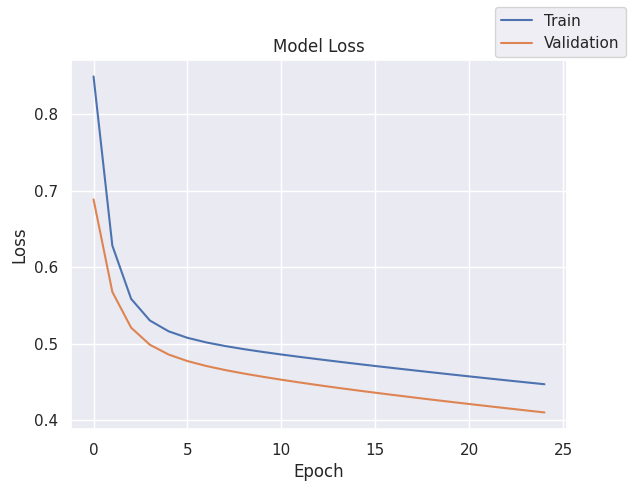

In [ ]:
plot(history,'loss')

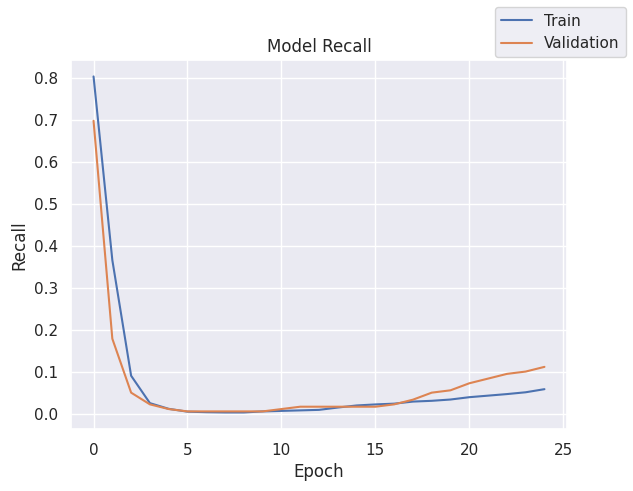

In [ ]:
plot(history,'Recall')

Model recall is not up to the mark

In [ ]:
results.loc[2]=['1','10','Relu',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760
2,1,10,Relu,25,100,GD,73.418526,0.446923,0.410033,0.058570,0.111732


Let us try adding one more hidden layer and see the performance

In [ ]:
#Now let us add another hidden layer
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
batch_size = 100
epochs=10
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - Recall: 0.5304 - loss: 0.8003 - val_Recall: 0.2570 - val_loss: 0.5676
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - Recall: 0.1891 - loss: 0.5560 - val_Recall: 0.0782 - val_loss: 0.4881
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - Recall: 0.0488 - loss: 0.5015 - val_Recall: 0.0447 - val_loss: 0.4579
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - Recall: 0.0134 - loss: 0.4812 - val_Recall: 0.0223 - val_loss: 0.4427
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - Recall: 0.0103 - loss: 0.4707 - val_Recall: 0.0112 - val_loss: 0.4331
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - Recall: 0.0109 - loss: 0.4635 - val_Recall: 0.0223 - val_loss: 0.4259
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - Recall: 0.0145 - loss: 0.4576 - val_Recall: 0.0391 - val_loss: 0.4201
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - Recall: 0.0208 - loss: 0.4528 - val_Recall: 0.0447 - val_loss: 0.4153
Epoch 9/10
80/80

In [ ]:
results.loc[3]=['2','10','Relu',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760
2,1,10,Relu,25,100,GD,73.418526,0.446923,0.410033,0.058570,0.111732
3,2,10,Relu,10,100,GD,37.162567,0.448853,0.407072,0.033909,0.061453


## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
#Let us create a neural network with Adam Optimizer
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
batch_size = 100
epochs=10
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - Recall: 0.2511 - loss: 0.7884 - val_Recall: 0.0223 - val_loss: 0.5573
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - Recall: 0.0109 - loss: 0.5521 - val_Recall: 0.0056 - val_loss: 0.4865
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - Recall: 0.0084 - loss: 0.4979 - val_Recall: 0.0223 - val_loss: 0.4429
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - Recall: 0.0249 - loss: 0.4628 - val_Recall: 0.0503 - val_loss: 0.4107
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - Recall: 0.0577 - loss: 0.4379 - val_Recall: 0.1006 - val_loss: 0.3896
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - Recall: 0.0800 - loss: 0.4214 - val_Recall: 0.1117 - val_loss: 0.3752
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - Recall: 0.1012 - loss: 0.4083 - val_Recall: 0.1788 - val_loss: 0.3638
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - Recall: 0.1401 - loss: 0.3966 - val_Recall: 0.2570 - val_loss: 0.3532
Epoch 9/10
80/80

In [ ]:
results.loc[4]=['2','10','Relu',epochs,batch_size,'Adam',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760
2,1,10,Relu,25,100,GD,73.418526,0.446923,0.410033,0.058570,0.111732
3,2,10,Relu,10,100,GD,37.162567,0.448853,0.407072,0.033909,0.061453
4,2,10,Relu,10,100,Adam,58.256154,0.380320,0.335310,0.283600,0.351955


### Neural Network with Adam Optimizer and Dropout

In [ ]:
#Let us create a neural network with Adam Optimizer and dropout
from tensorflow.keras.layers import Dropout
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
batch_size = 100
epochs=20
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - Recall: 0.3768 - loss: 0.6962 - val_Recall: 0.0000e+00 - val_loss: 0.5622
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - Recall: 0.0485 - loss: 0.5617 - val_Recall: 0.0000e+00 - val_loss: 0.4491
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - Recall: 0.0022 - loss: 0.4889 - val_Recall: 0.0000e+00 - val_loss: 0.4189
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - Recall: 0.0060 - loss: 0.4744 - val_Recall: 0.0000e+00 - val_loss: 0.4059
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - Recall: 0.0172 - loss: 0.4587 - val_Recall: 0.0056 - val_loss: 0.3962
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - Recall: 0.0252 - loss: 0.4521 - val_Recall: 0.0223 - val_loss: 0.3894
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - Recall: 0.0413 - loss: 0.4453 - val_Recall: 0.0559 - val_loss: 0.3817
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - Recall: 0.0542 - loss: 0.4344 - val_Recall: 0.0894 - val_loss: 0.37

In [ ]:
results.loc[5]=['2','10','Relu',epochs,batch_size,'Adam with dropout',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760
2,1,10,Relu,25,100,GD,73.418526,0.446923,0.410033,0.058570,0.111732
3,2,10,Relu,10,100,GD,37.162567,0.448853,0.407072,0.033909,0.061453
4,2,10,Relu,10,100,Adam,58.256154,0.380320,0.335310,0.283600,0.351955
5,2,10,Relu,20,100,Adam with dropout,159.641151,0.402173,0.328444,0.274353,0.357542


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
#Let us apply SMOTE and do an oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
batch_size = 128
epochs=50
start = time.time()
history = model.fit(x_train_smote, y_train_smote, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - Recall: 0.4788 - loss: 0.6931 - val_Recall: 0.5140 - val_loss: 0.6835
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - Recall: 0.4787 - loss: 0.6833 - val_Recall: 0.5251 - val_loss: 0.6680
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - Recall: 0.4888 - loss: 0.6751 - val_Recall: 0.5363 - val_loss: 0.6564
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - Recall: 0.5143 - loss: 0.6674 - val_Recall: 0.5642 - val_loss: 0.6462
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - Recall: 0.5531 - loss: 0.6594 - val_Recall: 0.5922 - val_loss: 0.6360
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - Recall: 0.5946 - loss: 0.6509 - val_Recall: 0.6201 - val_loss: 0.6249
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - Recall: 0.6382 - loss: 0.6416 - val_Recall: 0.6592 - val_loss: 0.6129
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - Recall: 0.6737 - loss: 0.6312 - val_Recall: 0.6927 - val_loss: 0.5999


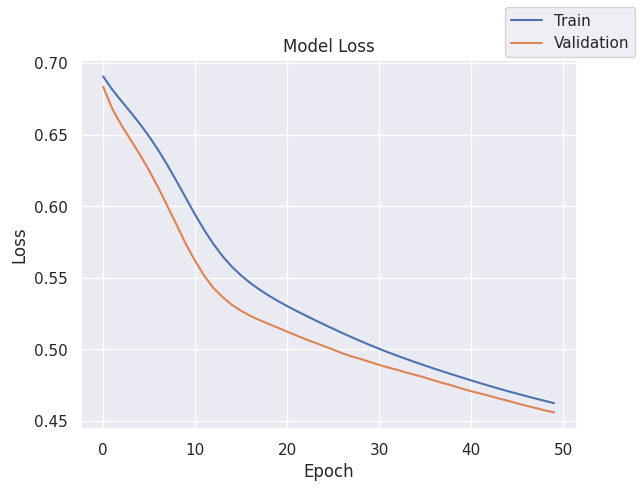

In [ ]:
plot(history,'loss')

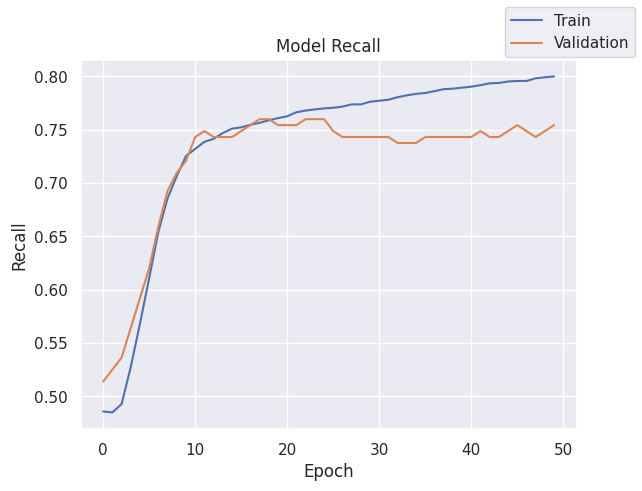

In [ ]:
plot(history,'Recall')

In [ ]:
results.loc[5]=['2','10','Relu',epochs,batch_size,'SGD with SMOTE',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760
2,1,10,Relu,25,100,GD,73.418526,0.446923,0.410033,0.058570,0.111732
3,2,10,Relu,10,100,GD,37.162567,0.448853,0.407072,0.033909,0.061453
4,2,10,Relu,10,100,Adam,58.256154,0.380320,0.335310,0.283600,0.351955
5,2,10,Relu,50,128,SGD with SMOTE,222.775490,0.462502,0.456001,0.799780,0.754190


Performance has increased drastically by using oversampling.

The reason could be that the target class(Exited = 1) is only 20%.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
batch_size = 128
epochs=20
start = time.time()
history = model.fit(x_train_smote, y_train_smote, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - Recall: 0.7272 - loss: 0.6939 - val_Recall: 0.6536 - val_loss: 0.6762
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - Recall: 0.6525 - loss: 0.6464 - val_Recall: 0.7542 - val_loss: 0.5885
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - Recall: 0.7342 - loss: 0.5601 - val_Recall: 0.7709 - val_loss: 0.5184
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - Recall: 0.7867 - loss: 0.5019 - val_Recall: 0.7654 - val_loss: 0.4892
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - Recall: 0.8049 - loss: 0.4742 - val_Recall: 0.7709 - val_loss: 0.4729
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - Recall: 0.8150 - loss: 0.4597 - val_Recall: 0.7598 - val_loss: 0.4634
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - Recall: 0.8100 - loss: 0.4518 - val_Recall: 0.7430 - val_loss: 0.4572
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - Recall: 0.8079 - loss: 0.4468 - val_Recall: 0.7430 - val_loss: 0.452

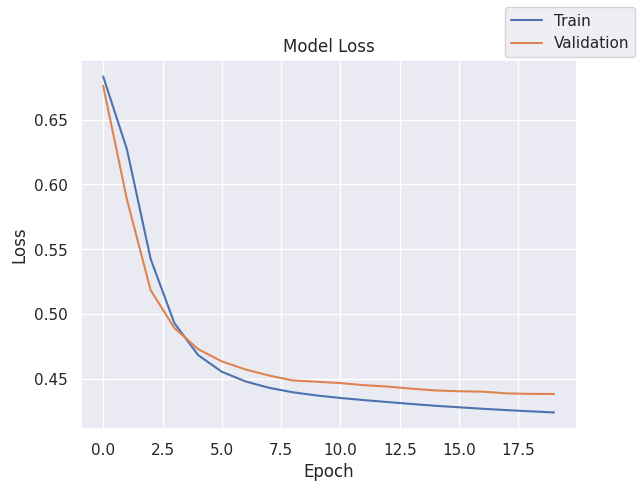

In [ ]:
plot(history,'loss')

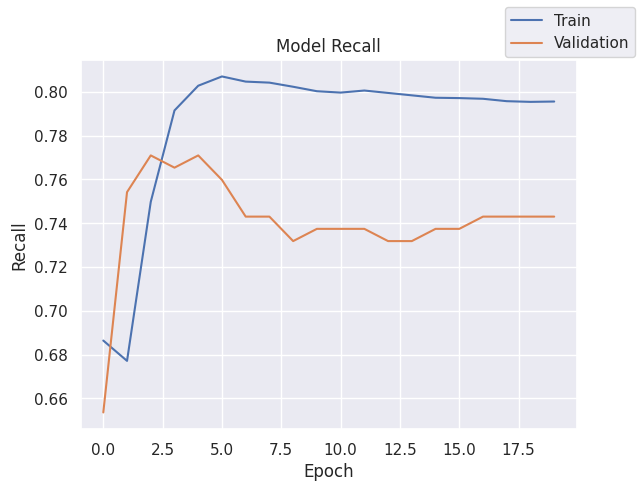

In [ ]:
plot(history,'Recall')

In [ ]:
results.loc[6]=['2','10','Relu',epochs,batch_size,'Adam with SMOTE',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760
2,1,10,Relu,25,100,GD,73.418526,0.446923,0.410033,0.058570,0.111732
3,2,10,Relu,10,100,GD,37.162567,0.448853,0.407072,0.033909,0.061453
4,2,10,Relu,10,100,Adam,58.256154,0.380320,0.335310,0.283600,0.351955
5,2,10,Relu,50,128,SGD with SMOTE,222.775490,0.462502,0.456001,0.799780,0.754190
6,2,10,Relu,20,128,Adam with SMOTE,186.110735,0.423981,0.438243,0.795547,0.743017


There is only negligible performance improvement by using Adam as the optimizer.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
batch_size = 128
epochs=30
start = time.time()
history = model.fit(x_train_smote, y_train_smote, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - Recall: 0.7026 - loss: 0.7099 - val_Recall: 0.7151 - val_loss: 0.7031
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - Recall: 0.6786 - loss: 0.6624 - val_Recall: 0.7095 - val_loss: 0.6296
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - Recall: 0.6890 - loss: 0.6129 - val_Recall: 0.7318 - val_loss: 0.5731
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - Recall: 0.7042 - loss: 0.5834 - val_Recall: 0.7598 - val_loss: 0.5429
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - Recall: 0.7369 - loss: 0.5644 - val_Recall: 0.7654 - val_loss: 0.5223
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - Recall: 0.7352 - loss: 0.5497 - val_Recall: 0.7709 - val_loss: 0.5097
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - Recall: 0.7400 - loss: 0.5366 - val_Recall: 0.7709 - val_loss: 0.4970
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - Recall: 0.7607 - loss: 0.5267 - val_Recall: 0.7877 - val_loss: 0.48

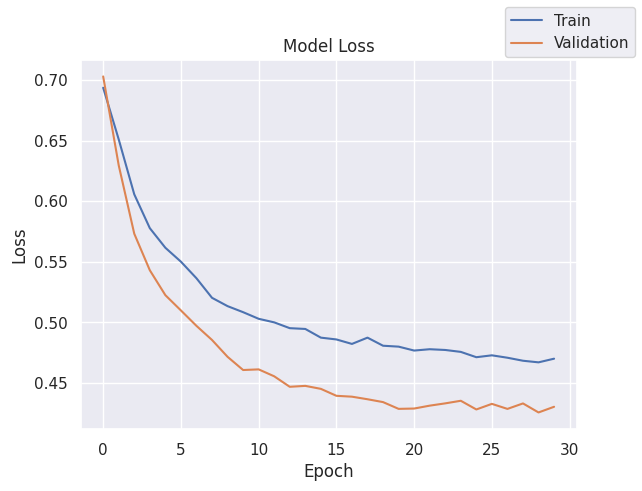

In [ ]:
plot(history,'loss')

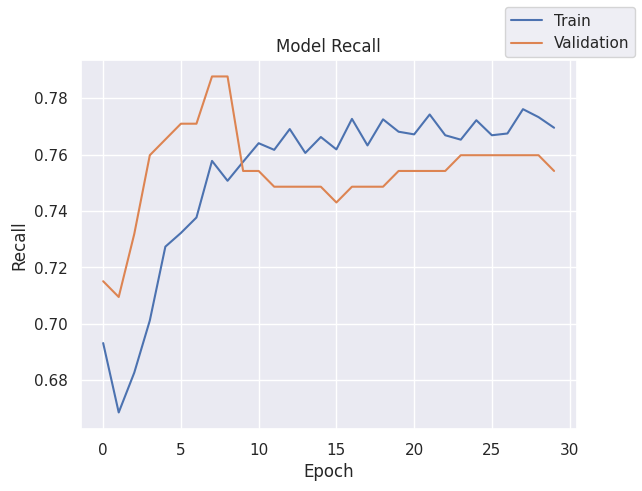

In [ ]:
plot(history,'Recall')

In [ ]:
results.loc[7]=['2','10','Relu',epochs,batch_size,'Adam/SMOTE/dropout',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760
2,1,10,Relu,25,100,GD,73.418526,0.446923,0.410033,0.058570,0.111732
3,2,10,Relu,10,100,GD,37.162567,0.448853,0.407072,0.033909,0.061453
4,2,10,Relu,10,100,Adam,58.256154,0.380320,0.335310,0.283600,0.351955
5,2,10,Relu,50,128,SGD with SMOTE,222.775490,0.462502,0.456001,0.799780,0.754190
6,2,10,Relu,20,128,Adam with SMOTE,186.110735,0.423981,0.438243,0.795547,0.743017
7,2,10,Relu,30,128,Adam/SMOTE/dropout,264.983897,0.469853,0.430117,0.769520,0.754190


Let us try TANH as the activation in the hidden layers

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
batch_size = 128
epochs=20
start = time.time()
history = model.fit(x_train_smote, y_train_smote, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - Recall: 0.4810 - loss: 0.7085 - val_Recall: 0.6704 - val_loss: 0.5716
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - Recall: 0.6725 - loss: 0.6019 - val_Recall: 0.7039 - val_loss: 0.5358
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - Recall: 0.7059 - loss: 0.5725 - val_Recall: 0.7151 - val_loss: 0.5278
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - Recall: 0.7130 - loss: 0.5616 - val_Recall: 0.7263 - val_loss: 0.5199
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - Recall: 0.7255 - loss: 0.5502 - val_Recall: 0.7207 - val_loss: 0.5116
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - Recall: 0.7273 - loss: 0.5480 - val_Recall: 0.7207 - val_loss: 0.5054
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - Recall: 0.7303 - loss: 0.5372 - val_Recall: 0.7263 - val_loss: 0.5020
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - Recall: 0.7435 - loss: 0.5316 - val_Recall: 0.7374 - val_loss: 0.4

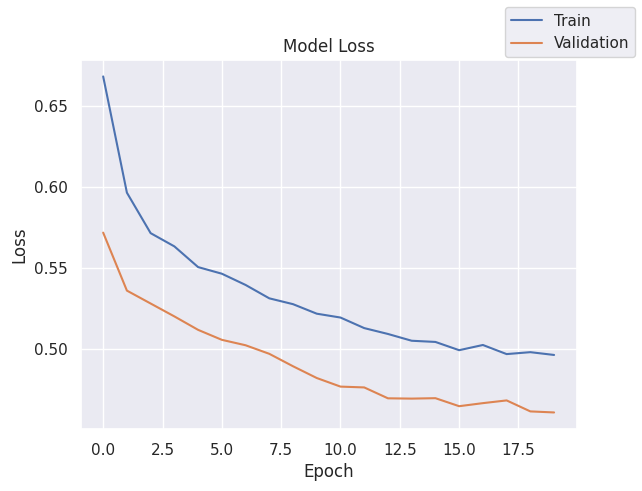

In [ ]:
plot(history,'loss')

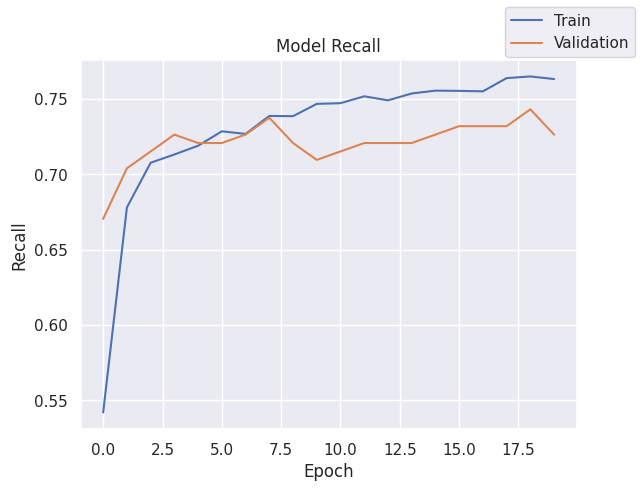

In [ ]:
plot(history,'Recall')

There is no performance increment by using tanh activation

In [ ]:
results.loc[8]=['2','10','Tanh',epochs,batch_size,'Adam/SMOTE/dropout',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760
2,1,10,Relu,25,100,GD,73.418526,0.446923,0.410033,0.058570,0.111732
3,2,10,Relu,10,100,GD,37.162567,0.448853,0.407072,0.033909,0.061453
4,2,10,Relu,10,100,Adam,58.256154,0.380320,0.335310,0.283600,0.351955
5,2,10,Relu,50,128,SGD with SMOTE,222.775490,0.462502,0.456001,0.799780,0.754190
6,2,10,Relu,20,128,Adam with SMOTE,186.110735,0.423981,0.438243,0.795547,0.743017
7,2,10,Relu,30,128,Adam/SMOTE/dropout,264.983897,0.469853,0.430117,0.769520,0.754190
8,2,10,Tanh,20,128,Adam/SMOTE/dropout,178.814239,0.496051,0.460532,0.763092,0.726257


Performance dropped marginally after using tanh as the hidden layer activation

Now let us try adding one more hidden layer and use relu as the activation in all the layers

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
batch_size = 128
epochs=20
start = time.time()
history = model.fit(x_train_smote, y_train_smote, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - Recall: 0.2671 - loss: 0.7692 - val_Recall: 0.6425 - val_loss: 0.7095
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - Recall: 0.6882 - loss: 0.6888 - val_Recall: 0.7542 - val_loss: 0.7066
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - Recall: 0.6766 - loss: 0.6747 - val_Recall: 0.6480 - val_loss: 0.6805
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - Recall: 0.5887 - loss: 0.6542 - val_Recall: 0.6257 - val_loss: 0.6479
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - Recall: 0.5915 - loss: 0.6283 - val_Recall: 0.5978 - val_loss: 0.6008
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - Recall: 0.6130 - loss: 0.6085 - val_Recall: 0.6201 - val_loss: 0.5659
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - Recall: 0.6532 - loss: 0.5843 - val_Recall: 0.6816 - val_loss: 0.5487
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - Recall: 0.6850 - loss: 0.5671 - val_Recall: 0.7039 - val_loss: 0.52

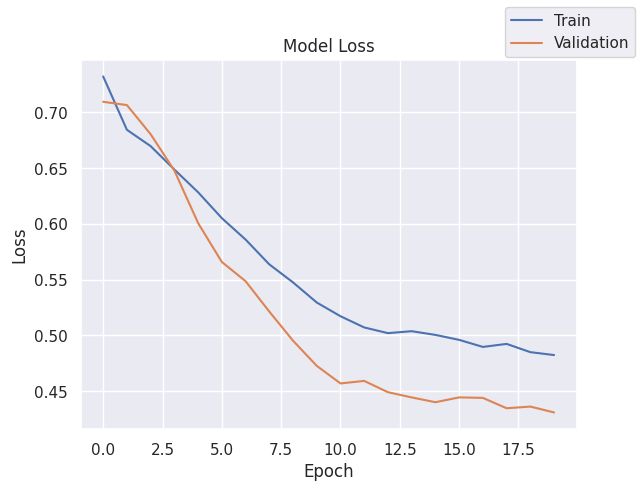

In [ ]:
plot(history,'loss')

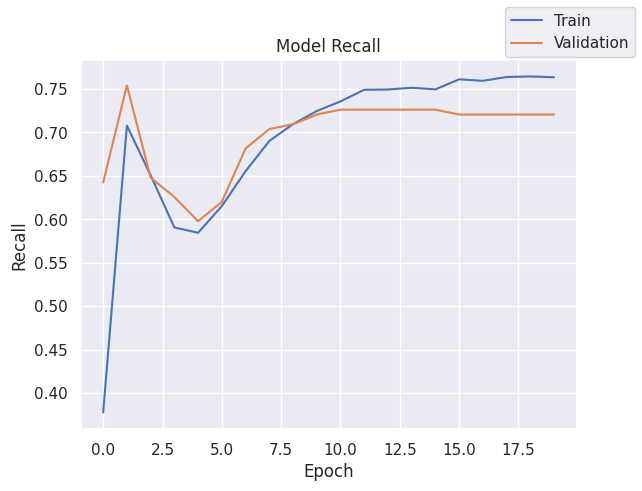

In [ ]:
plot(history,'Recall')

No performance increase even after adding the third hidden layer

In [ ]:
results.loc[9]=['3','10','relu',epochs,batch_size,'Adam/SMOTE/dropout',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Val_Recall
0,-,-,-,25,8000,GD,9.401447,2.154816,1.884171,0.216400,0.201117
1,-,-,-,25,100,GD,67.766734,3.144251,2.822409,0.040074,0.016760
2,1,10,Relu,25,100,GD,73.418526,0.446923,0.410033,0.058570,0.111732
3,2,10,Relu,10,100,GD,37.162567,0.448853,0.407072,0.033909,0.061453
4,2,10,Relu,10,100,Adam,58.256154,0.380320,0.335310,0.283600,0.351955
5,2,10,Relu,50,128,SGD with SMOTE,222.775490,0.462502,0.456001,0.799780,0.754190
6,2,10,Relu,20,128,Adam with SMOTE,186.110735,0.423981,0.438243,0.795547,0.743017
7,2,10,Relu,30,128,Adam/SMOTE/dropout,264.983897,0.469853,0.430117,0.769520,0.754190
8,2,10,Tanh,20,128,Adam/SMOTE/dropout,178.814239,0.496051,0.460532,0.763092,0.726257
9,3,10,relu,20,128,Adam/SMOTE/dropout,186.513607,0.482419,0.430949,0.763562,0.720670


Not much performance increase after adding the 3rd hidden layer

## Model Performance Comparison and Final Model Selection

Out of all the models model 7 with Adam optimizer, oversampled with SMOTE with dropout gave the best recall for validation data and even the training data.

Also using dropout will give a generalized model.

We will use this as our final model.

### Final model

Let us test the performance on the test data

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [ ]:
batch_size = 128
epochs=20
start = time.time()
history = model.fit(x_train_smote, y_train_smote, validation_data=(x_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - Recall: 0.5790 - loss: 0.7100 - val_Recall: 0.5805 - val_loss: 0.6495
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - Recall: 0.6106 - loss: 0.6447 - val_Recall: 0.6737 - val_loss: 0.5950
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - Recall: 0.6724 - loss: 0.6040 - val_Recall: 0.6992 - val_loss: 0.5572
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - Recall: 0.7124 - loss: 0.5734 - val_Recall: 0.7203 - val_loss: 0.5331
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - Recall: 0.7536 - loss: 0.5479 - val_Recall: 0.7246 - val_loss: 0.5155
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - Recall: 0.7653 - loss: 0.5312 - val_Recall: 0.7246 - val_loss: 0.5014
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - Recall: 0.7697 - loss: 0.5136 - val_Recall: 0.7458 - val_loss: 0.4973
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - Recall: 0.7761 - loss: 0.5104 - val_Recall: 0.7627 - val_loss: 

Even with test data the model gave decent recall and the recall is not much different from the training recall. So we can finalize this model.

Out of the total actual positives, only 25% were incorrectly predicted as negatives. Not very good, but not bad though, this is the best performance among all the 9 models. May be the features are not strong enough to make very accurate predictions.

## Actionable Insights and Business Recommendations

### Take aways from the EDA

* Customers with very low credit scores always exited.
* Germany has proportionately more customers exiting.
* Proportionately females are exiting more.
* Exited customers have marginally higher balance.
* Customers with one product have exited the most.
* Non active members have more chance of churning.
* Only age showed a weak correlation of 0.29, other input variables did not show any correlation with the target variable in the heat map analysis.

### Model training, performance and selection

* Different neural network models were created and trained.
* The most drastic performance came when the data was oversampled. It indicates that either the data sample is very less or the model was biasing more towards the major class and hence giving less recall values.
* Making tanh as the activation for the hidden layer instead of relu did not improve the performance much.
* Adding drop out also did not improve the performance either.
* The best model - was with Adam as the optimizer, with SMOTE oversampling, with 2 hidden layers with 10 neurons each with relu activation.
* But we will go with the dam as the optimizer, with SMOTE oversampling, with 2 hidden layers with 10 neurons each with relu activation with dropout model as it will give more generalized result and the performance is comparable to the model with highest recall.
* Our final model gave a recall of ~75% on the test data. This means that out of the total actual positives, only 25% will be incorrectly predicted as negatives.



<font size=6 color='blue'>Power Ahead</font>
___